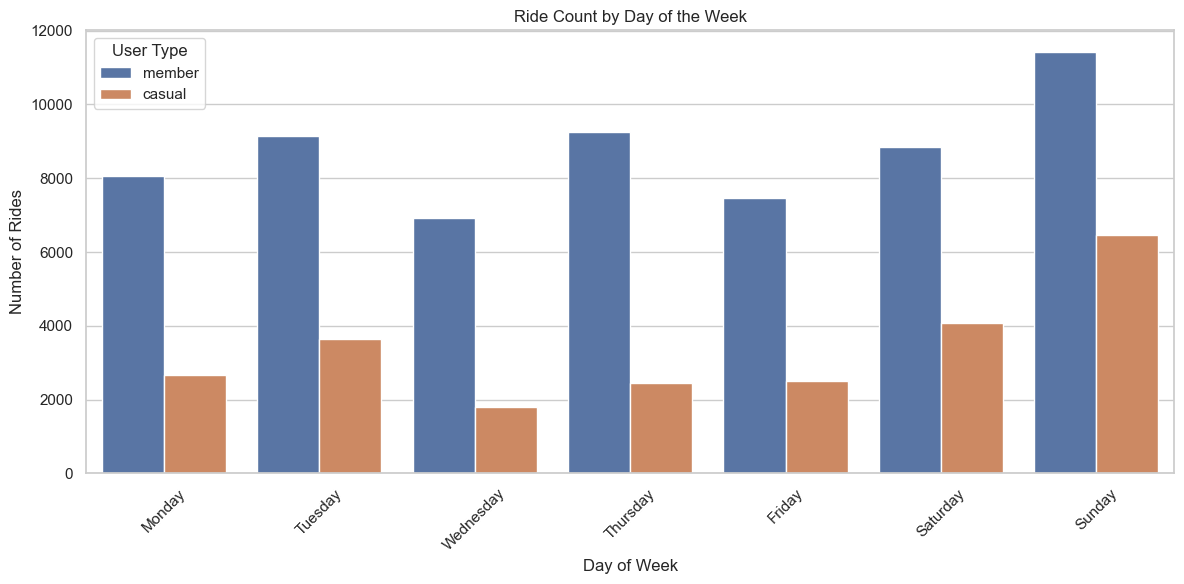

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load your dataset
df = pd.read_csv("202004-divvy-tripdata.csv")

df['started_at'] = pd.to_datetime(df['started_at'])
df['ended_at'] = pd.to_datetime(df['ended_at'])

df['trip_duration_min'] = (df['ended_at'] - df['started_at']).dt.total_seconds() / 60

df = df[df['trip_duration_min'] > 0]

df['day_of_week'] = df['started_at'].dt.day_name()


sns.set(style="whitegrid")


plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='day_of_week', hue='member_casual', order=[
    'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])


plt.title('Ride Count by Day of the Week')
plt.xlabel('Day of Week')
plt.ylabel('Number of Rides')
plt.legend(title='User Type')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()


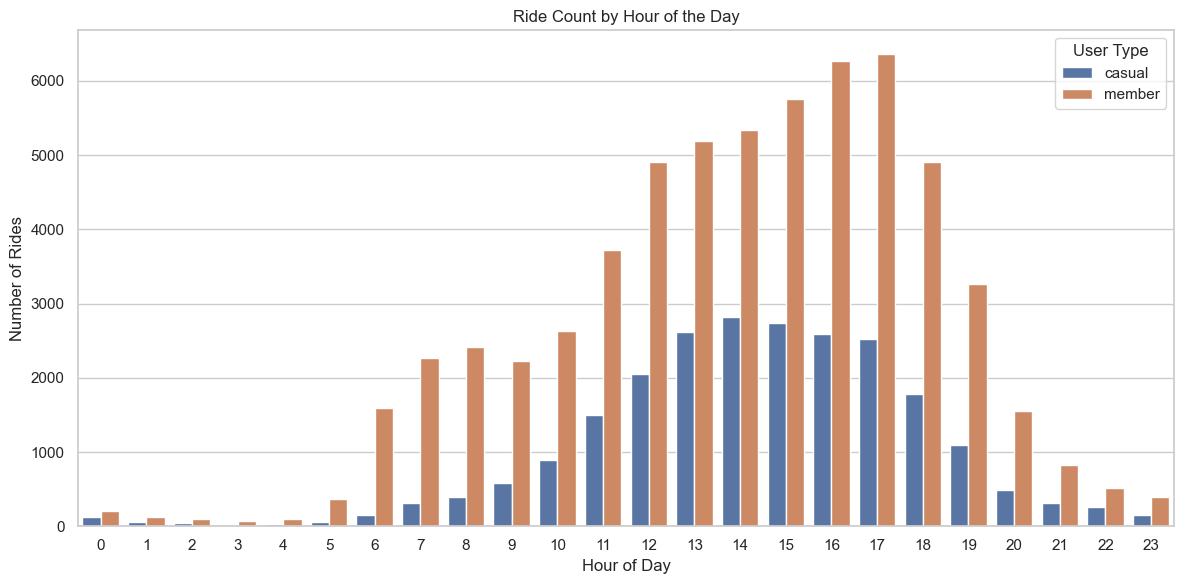

In [2]:
# Add hour column
df['hour_of_day'] = df['started_at'].dt.hour

# Plot
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='hour_of_day', hue='member_casual')
plt.title('Ride Count by Hour of the Day')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Rides')
plt.legend(title='User Type')
plt.tight_layout()
plt.show()


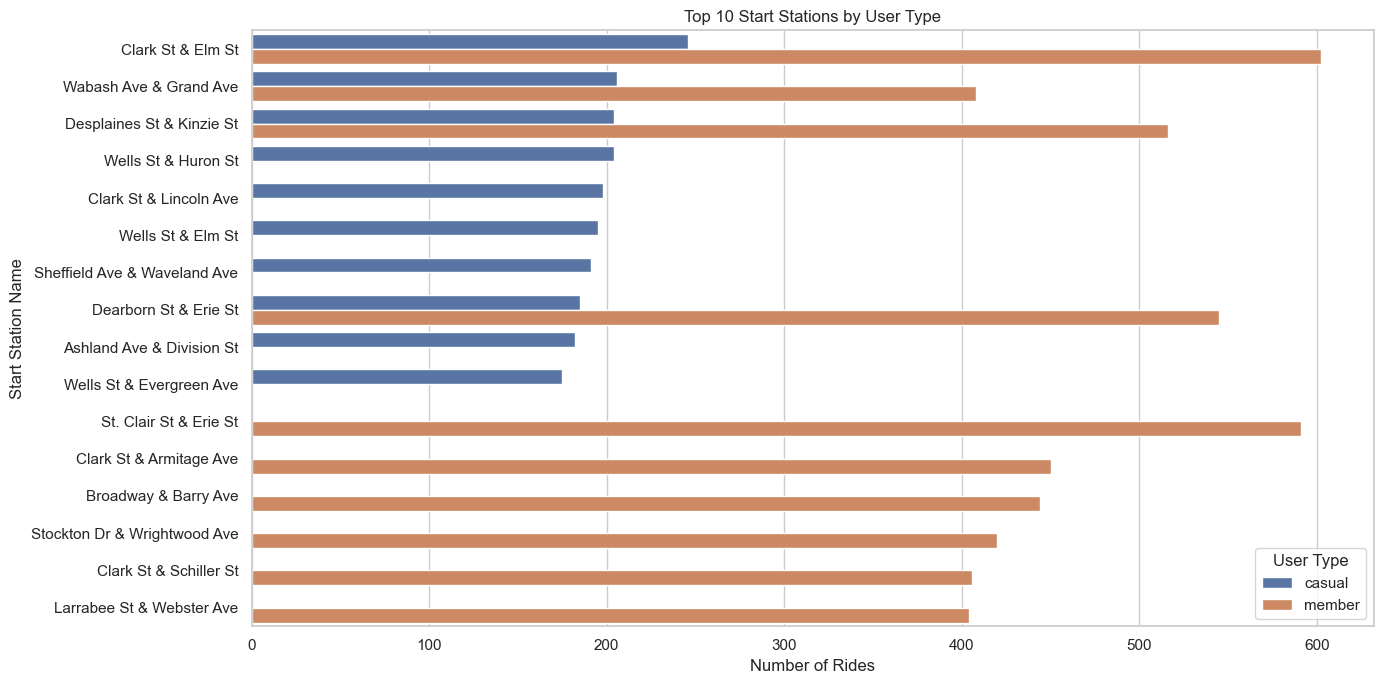

In [3]:
# Group and count rides by start station for each user type
top_stations_casual = df[df['member_casual'] == 'casual']['start_station_name'].value_counts().nlargest(10)
top_stations_member = df[df['member_casual'] == 'member']['start_station_name'].value_counts().nlargest(10)

# Combine into one DataFrame for comparison
top_casual_df = top_stations_casual.reset_index()
top_casual_df.columns = ['start_station_name', 'ride_count']
top_casual_df['member_casual'] = 'casual'

top_member_df = top_stations_member.reset_index()
top_member_df.columns = ['start_station_name', 'ride_count']
top_member_df['member_casual'] = 'member'

combined_top = pd.concat([top_casual_df, top_member_df])

# Plot
plt.figure(figsize=(14, 7))
sns.barplot(data=combined_top, x='ride_count', y='start_station_name', hue='member_casual')
plt.title('Top 10 Start Stations by User Type')
plt.xlabel('Number of Rides')
plt.ylabel('Start Station Name')
plt.legend(title='User Type')
plt.tight_layout()
plt.show()


In [2]:
import pandas as pd

# Load dataset
df = pd.read_csv('202004-divvy-tripdata.csv')

# Convert to datetime
df['started_at'] = pd.to_datetime(df['started_at'])
df['ended_at'] = pd.to_datetime(df['ended_at'])

# Calculate trip duration in minutes
df['trip_duration_min'] = (df['ended_at'] - df['started_at']).dt.total_seconds() / 60

# Filter out negative durations (data issues)
df = df[df['trip_duration_min'] > 0]

# Add user-friendly columns
df['day_of_week'] = df['started_at'].dt.day_name()
df['hour_of_day'] = df['started_at'].dt.hour


C:\Users\gampa\AppData\Local\Temp\ipykernel_3700\3347179679.py:12: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='User Type')


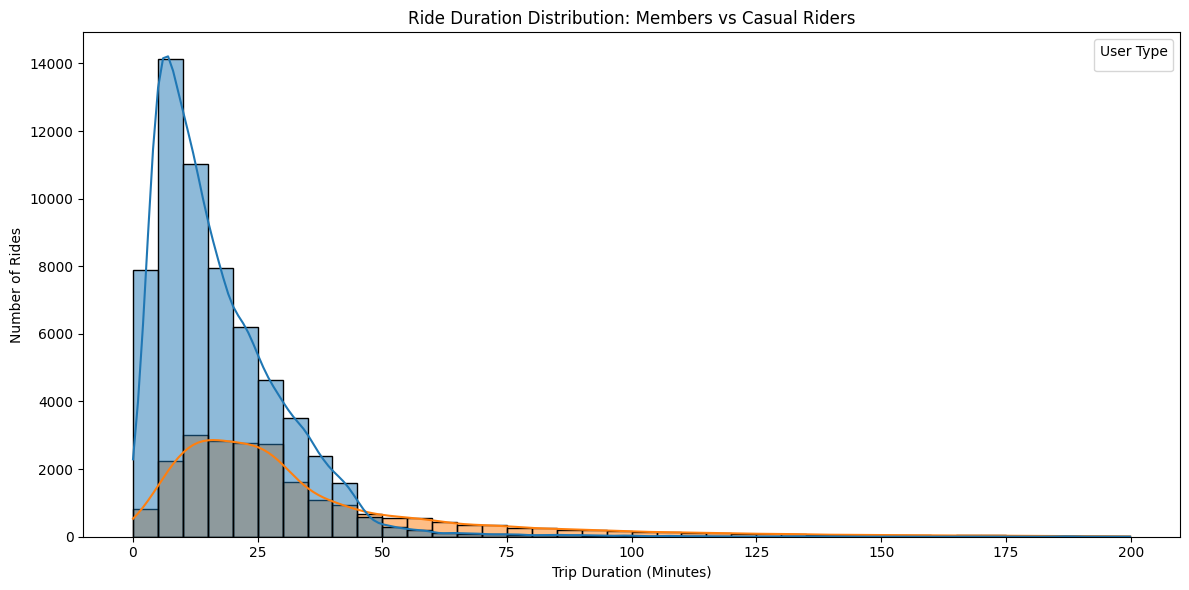

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter extreme outliers (e.g., rides longer than 200 mins)
filtered_df = df[df['trip_duration_min'] < 200]

plt.figure(figsize=(12, 6))
sns.histplot(data=filtered_df, x='trip_duration_min', hue='member_casual', kde=True, bins=40)
plt.title('Ride Duration Distribution: Members vs Casual Riders')
plt.xlabel('Trip Duration (Minutes)')
plt.ylabel('Number of Rides')
plt.legend(title='User Type')
plt.tight_layout()
plt.show()


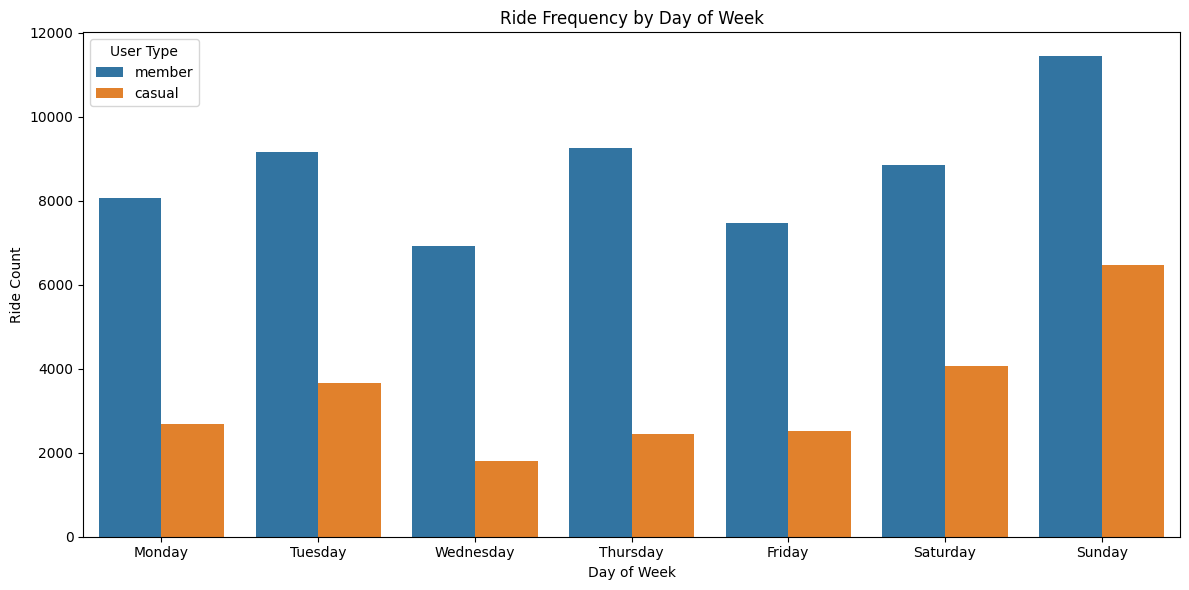

In [4]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='day_of_week', hue='member_casual', 
              order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title('Ride Frequency by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Ride Count')
plt.legend(title='User Type')
plt.tight_layout()
plt.show()


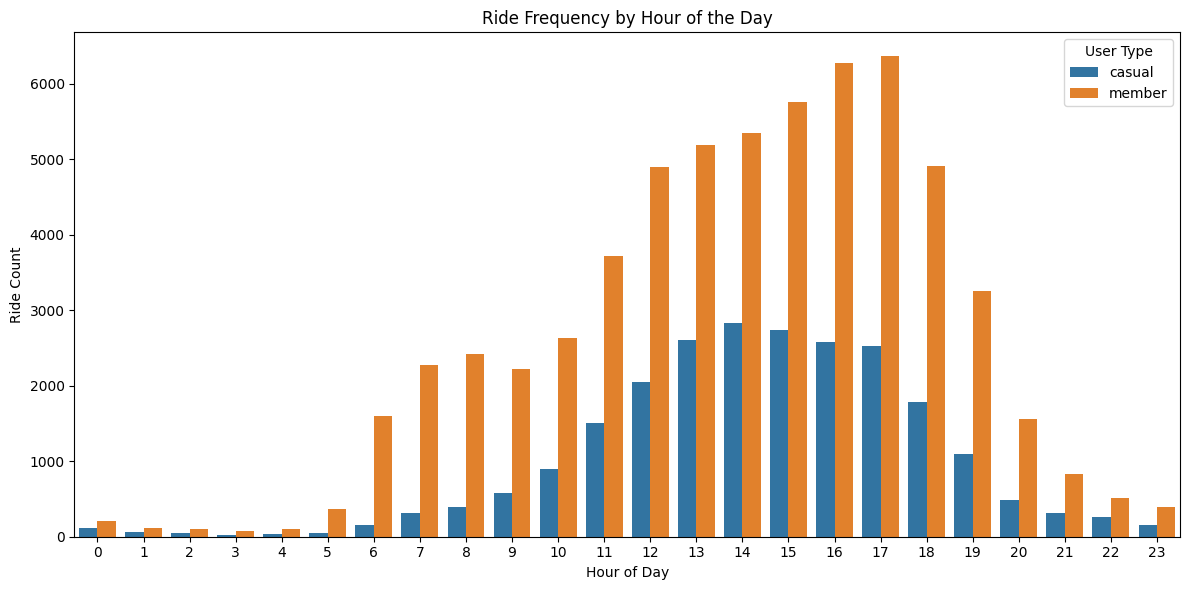

In [5]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='hour_of_day', hue='member_casual')
plt.title('Ride Frequency by Hour of the Day')
plt.xlabel('Hour of Day')
plt.ylabel('Ride Count')
plt.legend(title='User Type')
plt.tight_layout()
plt.show()


C:\Users\gampa\AppData\Local\Temp\ipykernel_3700\678799772.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_stations_df, x='Ride Count', y='Start Station', palette='rocket')


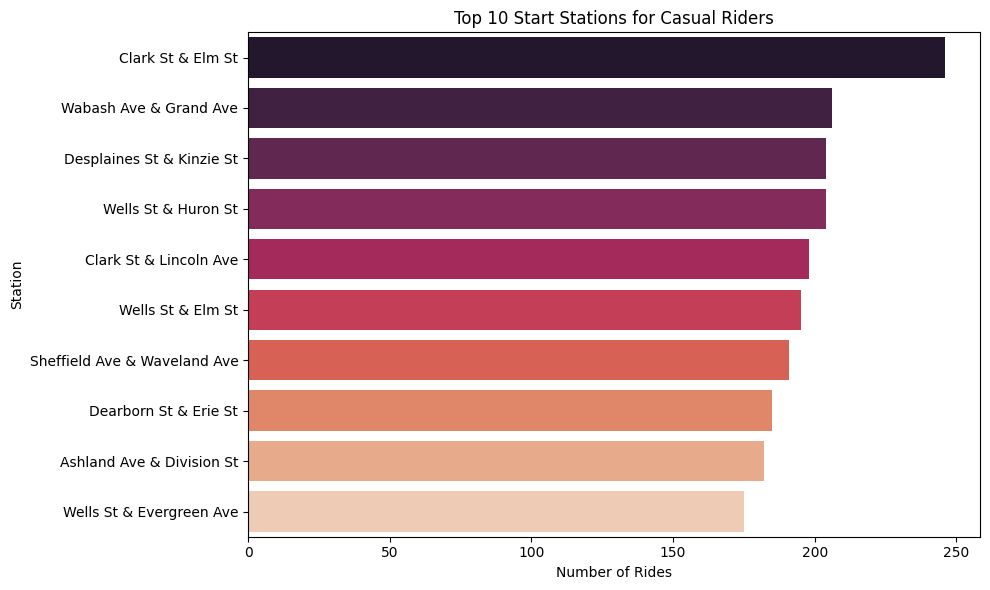

In [6]:
top_stations = df[df['member_casual'] == 'casual']['start_station_name'].value_counts().nlargest(10)
top_stations_df = top_stations.reset_index()
top_stations_df.columns = ['Start Station', 'Ride Count']

plt.figure(figsize=(10, 6))
sns.barplot(data=top_stations_df, x='Ride Count', y='Start Station', palette='rocket')
plt.title('Top 10 Start Stations for Casual Riders')
plt.xlabel('Number of Rides')
plt.ylabel('Station')
plt.tight_layout()
plt.show()


In [14]:
import pandas as pd

# Load dataset
df = pd.read_csv('202004-divvy-tripdata.csv')

df['started_at'] = pd.to_datetime(df['started_at'])
df['ended_at'] = pd.to_datetime(df['ended_at'])

df['trip_duration_min'] = (df['ended_at'] - df['started_at']).dt.total_seconds() / 60
df = df[df['trip_duration_min'] > 0]  # Filter out invalid trips

# 1️⃣ Ride Duration Statistics
ride_duration_stats = df['trip_duration_min'].describe()

# 2️⃣ Total Number of Unique Bike Types
total_bike_types = df['rideable_type'].nunique()
bike_types = df['rideable_type'].value_counts()

# 3️⃣ Total Trips
total_trips = len(df)

# 4️⃣ Total Trips by Starting Location
start_location_counts = df['start_station_name'].value_counts()

# 5️⃣ Total Trips by Ending Location
end_location_counts = df['end_station_name'].value_counts()

# 📊 Display Output
print("1️⃣ Ride Duration Statistics (in minutes):\n", ride_duration_stats)
print("\n2️⃣ Total Number of Bike Types:", total_bike_types)
print("Bike Types Breakdown:\n", bike_types)
print("\n3️⃣ Total Number of Trips:", total_trips)
print("\n4️⃣ Top 10 Starting Locations:\n", start_location_counts.head(10))
print("\n5️⃣ Top 10 Ending Locations:\n", end_location_counts.head(10))


1️⃣ Ride Duration Statistics (in minutes):
 count    84717.000000
mean        35.875168
std        567.731952
min          0.016667
25%          8.766667
50%         16.383333
75%         28.066667
max      58720.033333
Name: trip_duration_min, dtype: float64

2️⃣ Total Number of Bike Types: 1
Bike Types Breakdown:
 rideable_type
docked_bike    84717
Name: count, dtype: int64

3️⃣ Total Number of Trips: 84717

4️⃣ Top 10 Starting Locations:
 start_station_name
Clark St & Elm St               848
Dearborn St & Erie St           730
Desplaines St & Kinzie St       720
St. Clair St & Erie St          684
Clark St & Armitage Ave         625
Wabash Ave & Grand Ave          614
Broadway & Barry Ave            605
Stockton Dr & Wrightwood Ave    584
Larrabee St & Webster Ave       576
Clark St & Schiller St          574
Name: count, dtype: int64

5️⃣ Top 10 Ending Locations:
 end_station_name
Clark St & Elm St            892
Dearborn St & Erie St        785
St. Clair St & Erie St       695
De

## Ride Duration Summary (Box Plot)

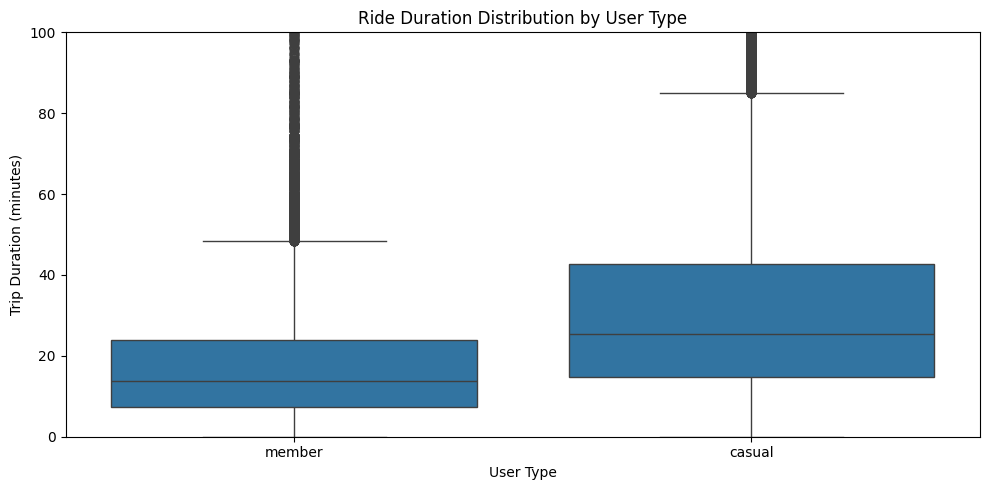

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x='member_casual', y='trip_duration_min')
plt.title('Ride Duration Distribution by User Type')
plt.xlabel('User Type')
plt.ylabel('Trip Duration (minutes)')
plt.ylim(0, 100)  # Limit to reduce outliers for clarity
plt.tight_layout()
plt.show()


## Total Bike Types (Bar Plot)

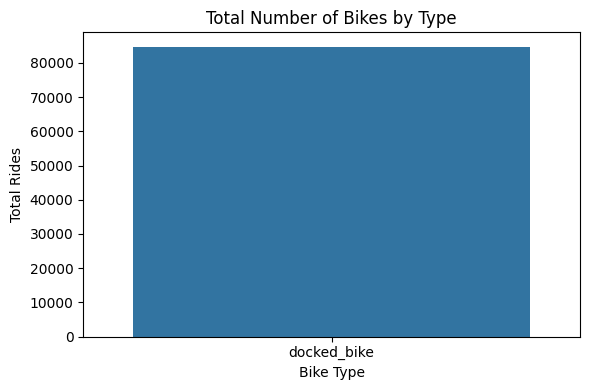

In [10]:
bike_counts = df['rideable_type'].value_counts()

plt.figure(figsize=(6, 4))
sns.barplot(x=bike_counts.index, y=bike_counts.values)
plt.title('Total Number of Bikes by Type')
plt.xlabel('Bike Type')
plt.ylabel('Total Rides')
plt.tight_layout()
plt.show()


## Total Trips (Single Metric)

In [11]:
total_trips = len(df)
print(f"Total Trips: {total_trips}")


Total Trips: 84717


## Total Trips at Starting Location (Top 10)


C:\Users\gampa\AppData\Local\Temp\ipykernel_3700\3458415418.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=start_counts.index, x=start_counts.values, palette="Blues_d")


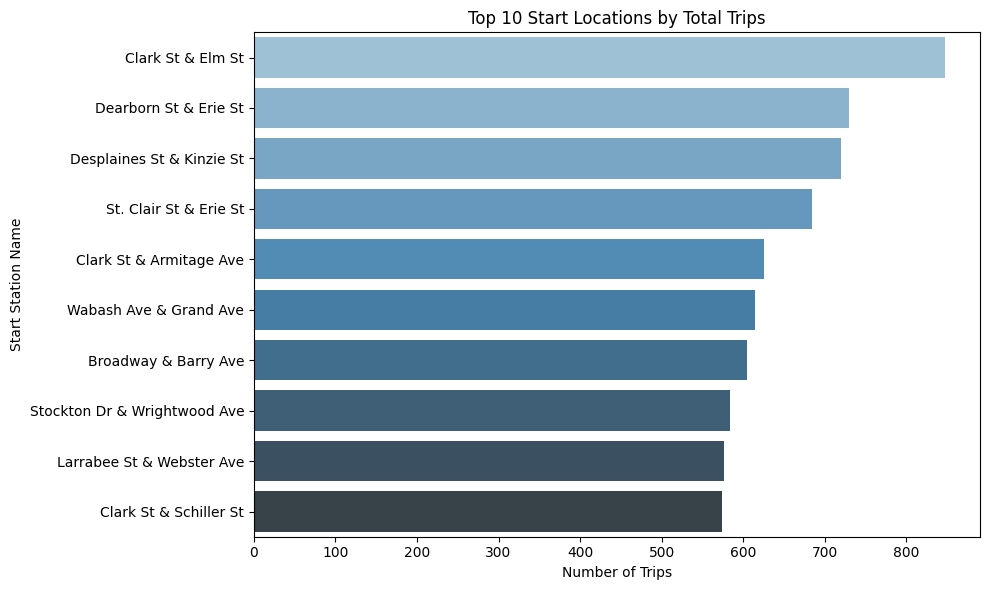

In [12]:
start_counts = df['start_station_name'].value_counts().head(10)

plt.figure(figsize=(10, 6))
sns.barplot(y=start_counts.index, x=start_counts.values, palette="Blues_d")
plt.title('Top 10 Start Locations by Total Trips')
plt.xlabel('Number of Trips')
plt.ylabel('Start Station Name')
plt.tight_layout()
plt.show()


## Total Trips at Ending Location (Top 10)

C:\Users\gampa\AppData\Local\Temp\ipykernel_3700\3191481632.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=end_counts.index, x=end_counts.values, palette="Greens_d")


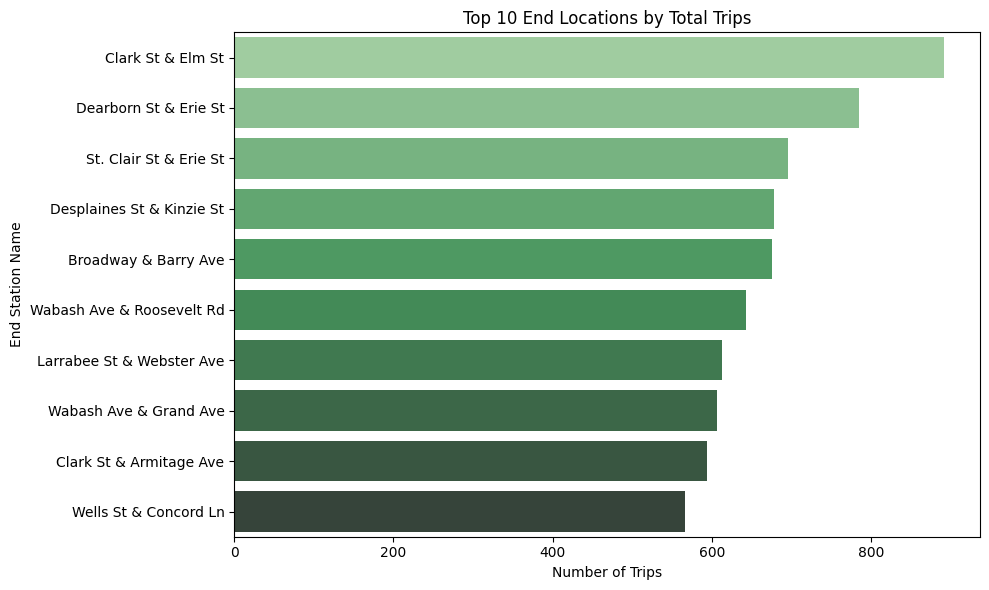

In [13]:
end_counts = df['end_station_name'].value_counts().head(10)

plt.figure(figsize=(10, 6))
sns.barplot(y=end_counts.index, x=end_counts.values, palette="Greens_d")
plt.title('Top 10 End Locations by Total Trips')
plt.xlabel('Number of Trips')
plt.ylabel('End Station Name')
plt.tight_layout()
plt.show()
